In [20]:
# Importing Important libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Reading csv file....
df=pd.read_csv('red_wine_quality.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Analysis:

I) Features/Input variables (based on physicochemical tests):                                                           
   1 - fixed acidity,                                            
   2 - volatile acidity,                              
   3 - citric acid,                                       
   4 - residual sugar,                                            
   5 - chlorides,                                          
   6 - free sulfur dioxide,                                                    
   7 - total sulfur dioxide,                                 
   8 - density,                                                             
   9 - pH,                                                                         
   10 - sulphates,                                                       
   11 - alcohol                         

II) Output variable/Target (based on sensory data):  
    >> quality (score between 0 and 10) 

III) We have to predict the quality of the red wine that scores between 0 to 10 (where 10 represents the best quality).     

IV) Now we will make the predict feature as categorical by setting up the quality values:                    
    >> 0 to 7 as not good and,    [(0-7) = not good]      
    >> above 7 as good one.       [(>7)= good]                                                       
    
V) So, by converting the Quality Feature into categories of 0 and 1,(where 1 is "not good" and 0 is "good").               

VI) Thus I will use Logistic Regression and Classification Models.                                      

# EDA ANALYSIS

In [22]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 1599 rows and 12 columns.
df.shape

(1599, 12)

In [23]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [24]:
# Printing the last 10 columns of the dataset.... 
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [25]:
# Counting Number of different qualities of wine present.......
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values of {} : {}'.format(i,df[i].nunique()))

Number of unique values of fixed acidity : 96
Number of unique values of volatile acidity : 143
Number of unique values of citric acid : 80
Number of unique values of residual sugar : 91
Number of unique values of chlorides : 153
Number of unique values of free sulfur dioxide : 60
Number of unique values of total sulfur dioxide : 144
Number of unique values of density : 436
Number of unique values of pH : 89
Number of unique values of sulphates : 96
Number of unique values of alcohol : 65
Number of unique values of quality : 6


In [27]:
# Statistical Features Information......
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
# checking the Features information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Univarient Graphs:

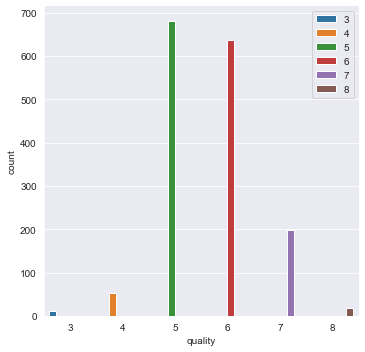

In [29]:
#No of wine quality types 
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()
# we can see that wine with quality i.e average is more than the rest.......
# and very few best quality wines are vailable ,so they must be costly......

fixed acidity              AxesSubplot(0.125,0.772143;0.352273x0.107857)
volatile acidity        AxesSubplot(0.547727,0.772143;0.352273x0.107857)
citric acid                AxesSubplot(0.125,0.642714;0.352273x0.107857)
residual sugar          AxesSubplot(0.547727,0.642714;0.352273x0.107857)
chlorides                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
free sulfur dioxide     AxesSubplot(0.547727,0.513286;0.352273x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.383857;0.352273x0.107857)
density                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
pH                         AxesSubplot(0.125,0.254429;0.352273x0.107857)
sulphates               AxesSubplot(0.547727,0.254429;0.352273x0.107857)
alcohol                       AxesSubplot(0.125,0.125;0.352273x0.107857)
quality                    AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

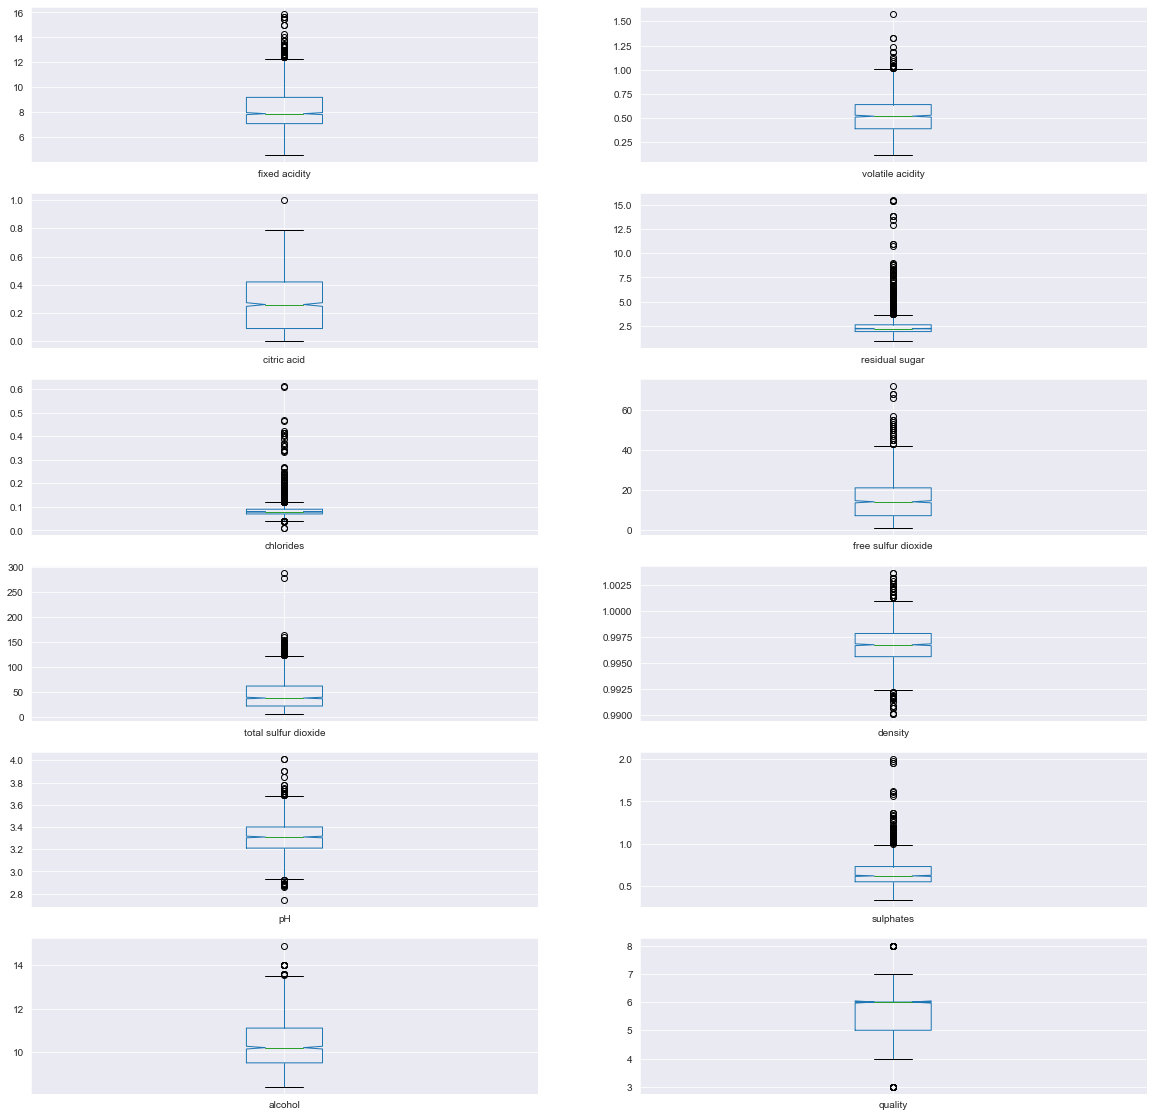

In [30]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,2),figsize=(20,20),grid=True,notch=True)

##### Conclusion from Boxplot : Lot's of outliers are present in many faetures.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002970A60C408>,
      dtype=object)

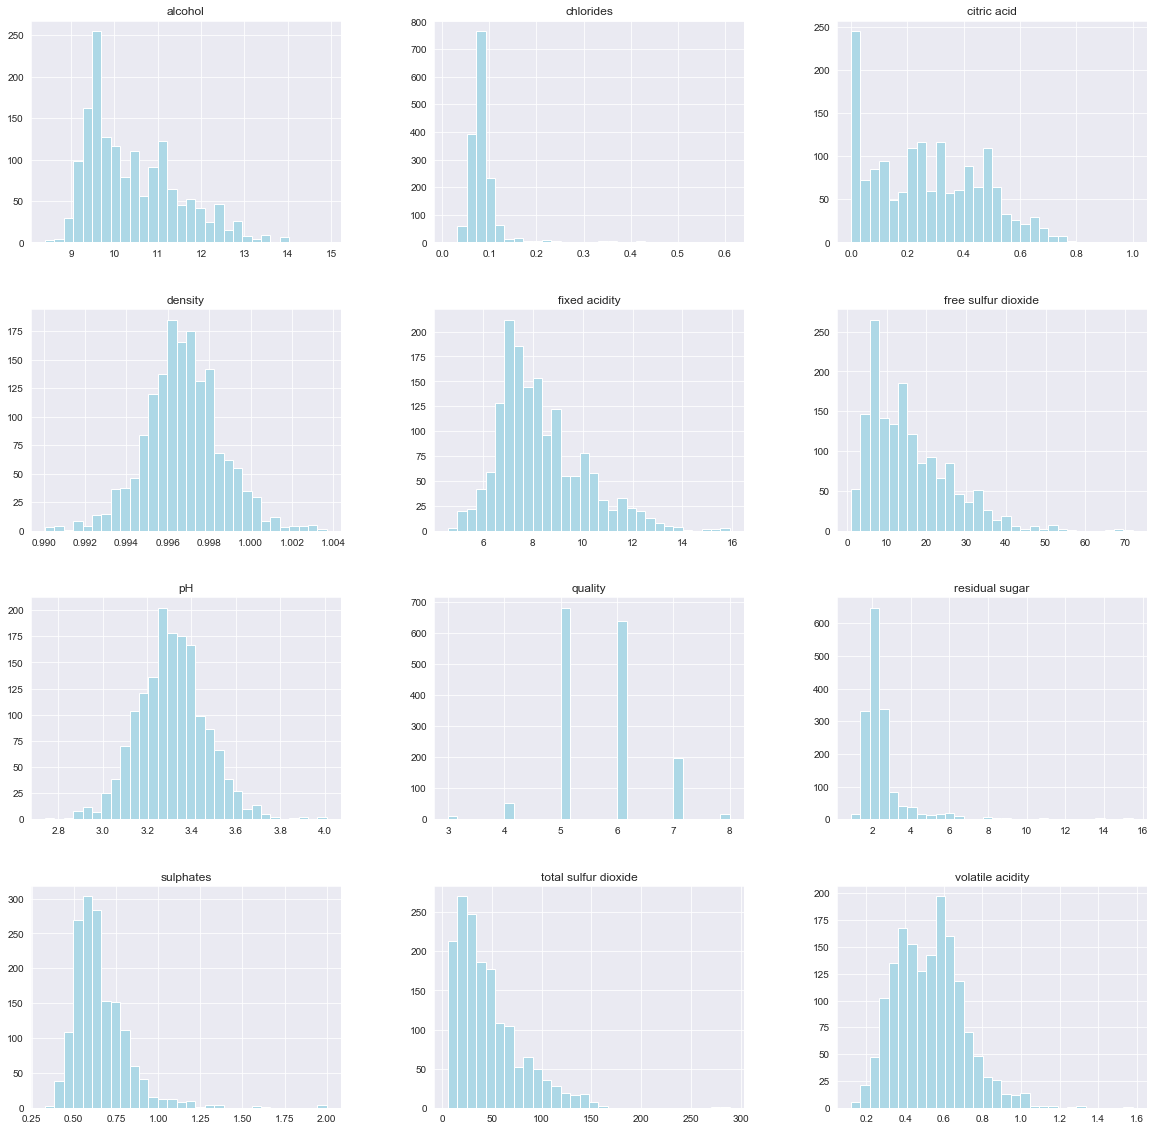

In [31]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(4,3),bins=30,color='lightblue') 

##### Conclusion from histogram : In some Features Skewness is present.

## Multivariate Plots Analysis:

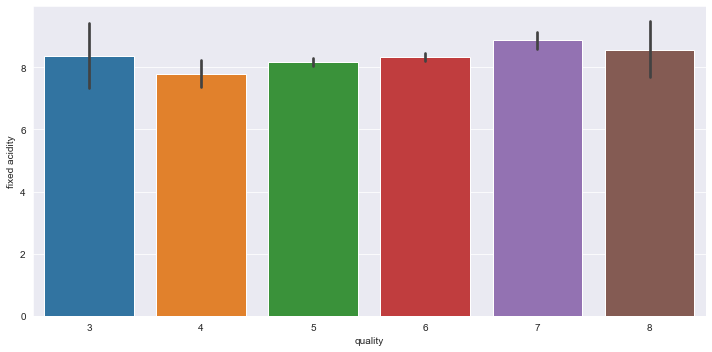

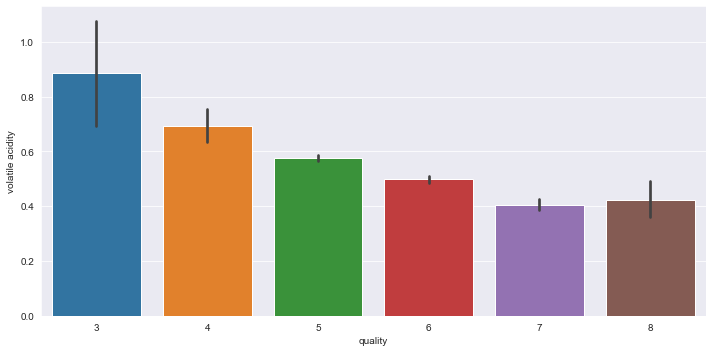

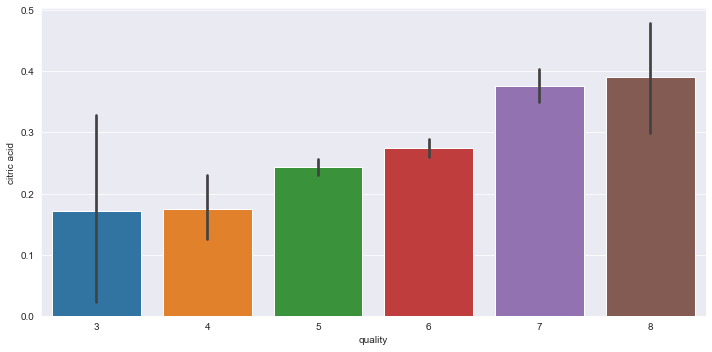

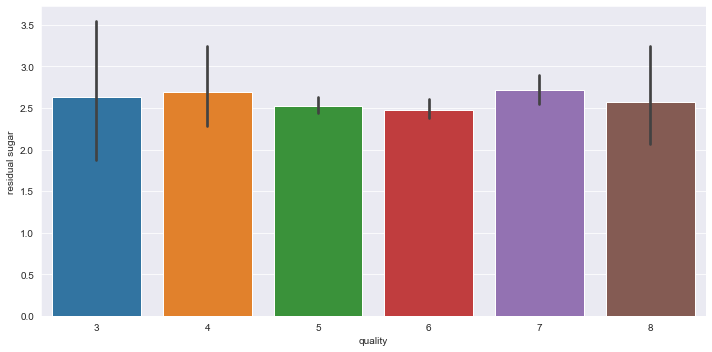

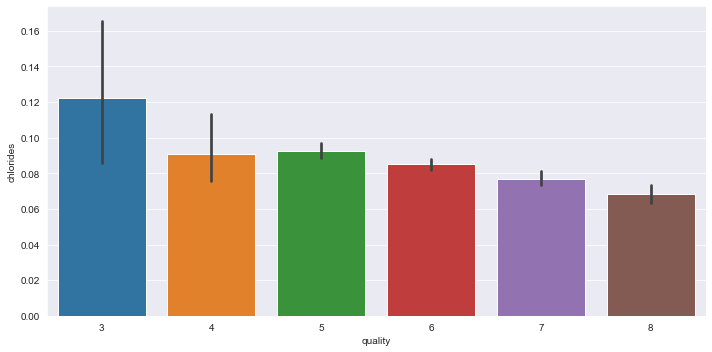

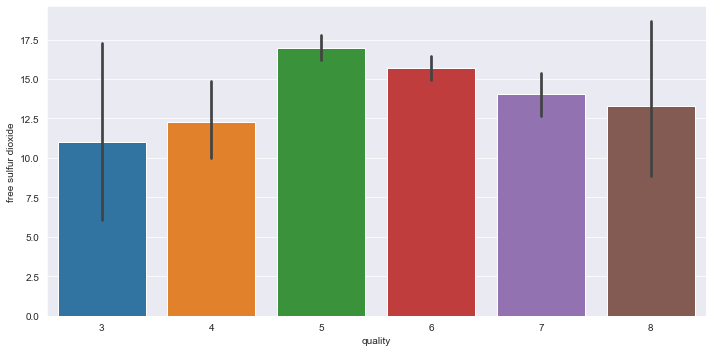

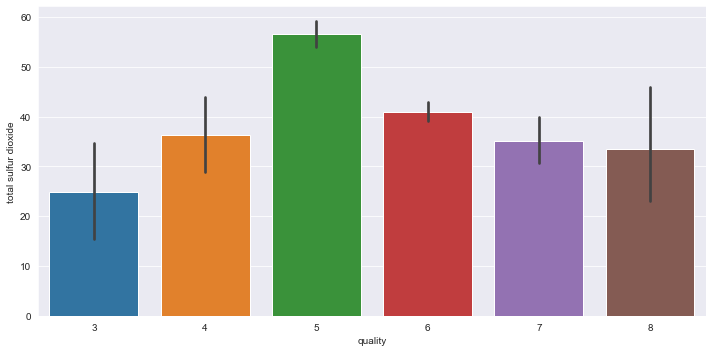

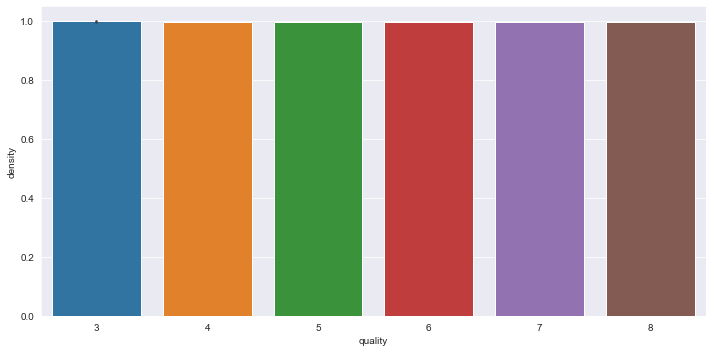

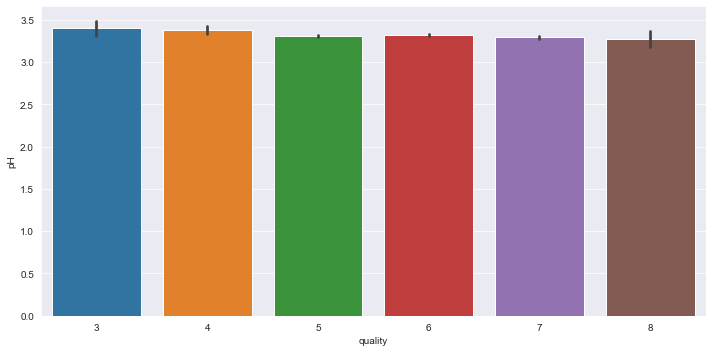

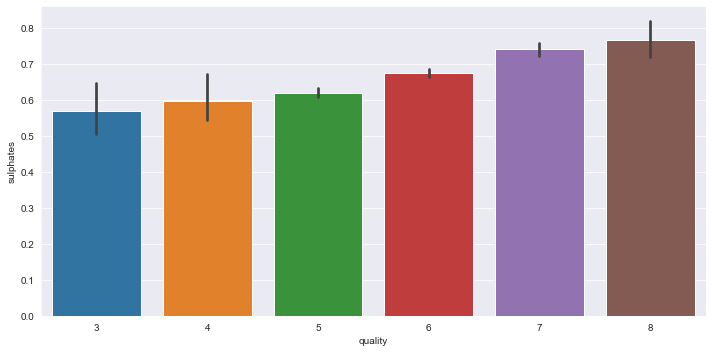

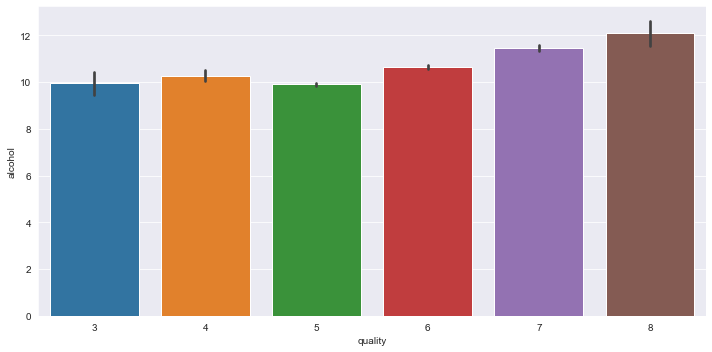

In [32]:
model=df.drop(['quality'],axis=1)
models=model.columns.values
sns.set_style("darkgrid")
for i in models:
    plt.subplots(figsize=(10,5))
    sns.barplot(x='quality',y=i,data=df,)
    plt.tight_layout()

##### Conclusion from Barplot:                     
1) Volatile acidity is inversely proportional to quality.                           
2) Adding more citric acid results in good quality.                            
3) Less Chlorides means good quality of wine.                             
4) Quality increases if ph value decreases. but ph value should not be reduced below a certain limit.                
4) Adding Sulphates will increase wine quality.                           
5) Quality of wine increases if the wine contains more alcohol.                           

In [33]:
# Now according to the instructions I'm changing the Quality feature to categorical values i.e 
# 1) if the quality is greater than 6 then it is "Good" quality and,
# 2) if quality lies between 0 and 6 then the quality is "Not Good",

df['quality']=np.where(df['quality']>6 ,'Good','Not Good')
df.head(10)
 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Not Good
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Not Good
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Not Good


In [35]:
# Now I'm doing Label Encoding to change the values from "Not Good" to 1 and "Good"  to 0.
from sklearn.preprocessing import LabelEncoder
df['quality'] = LabelEncoder().fit_transform(df['quality'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


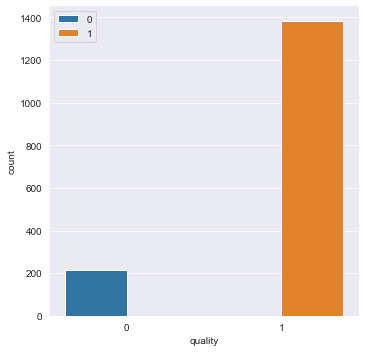

In [36]:
#No of wine quality types 
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()

# Thus Good Quality Wines are less in number

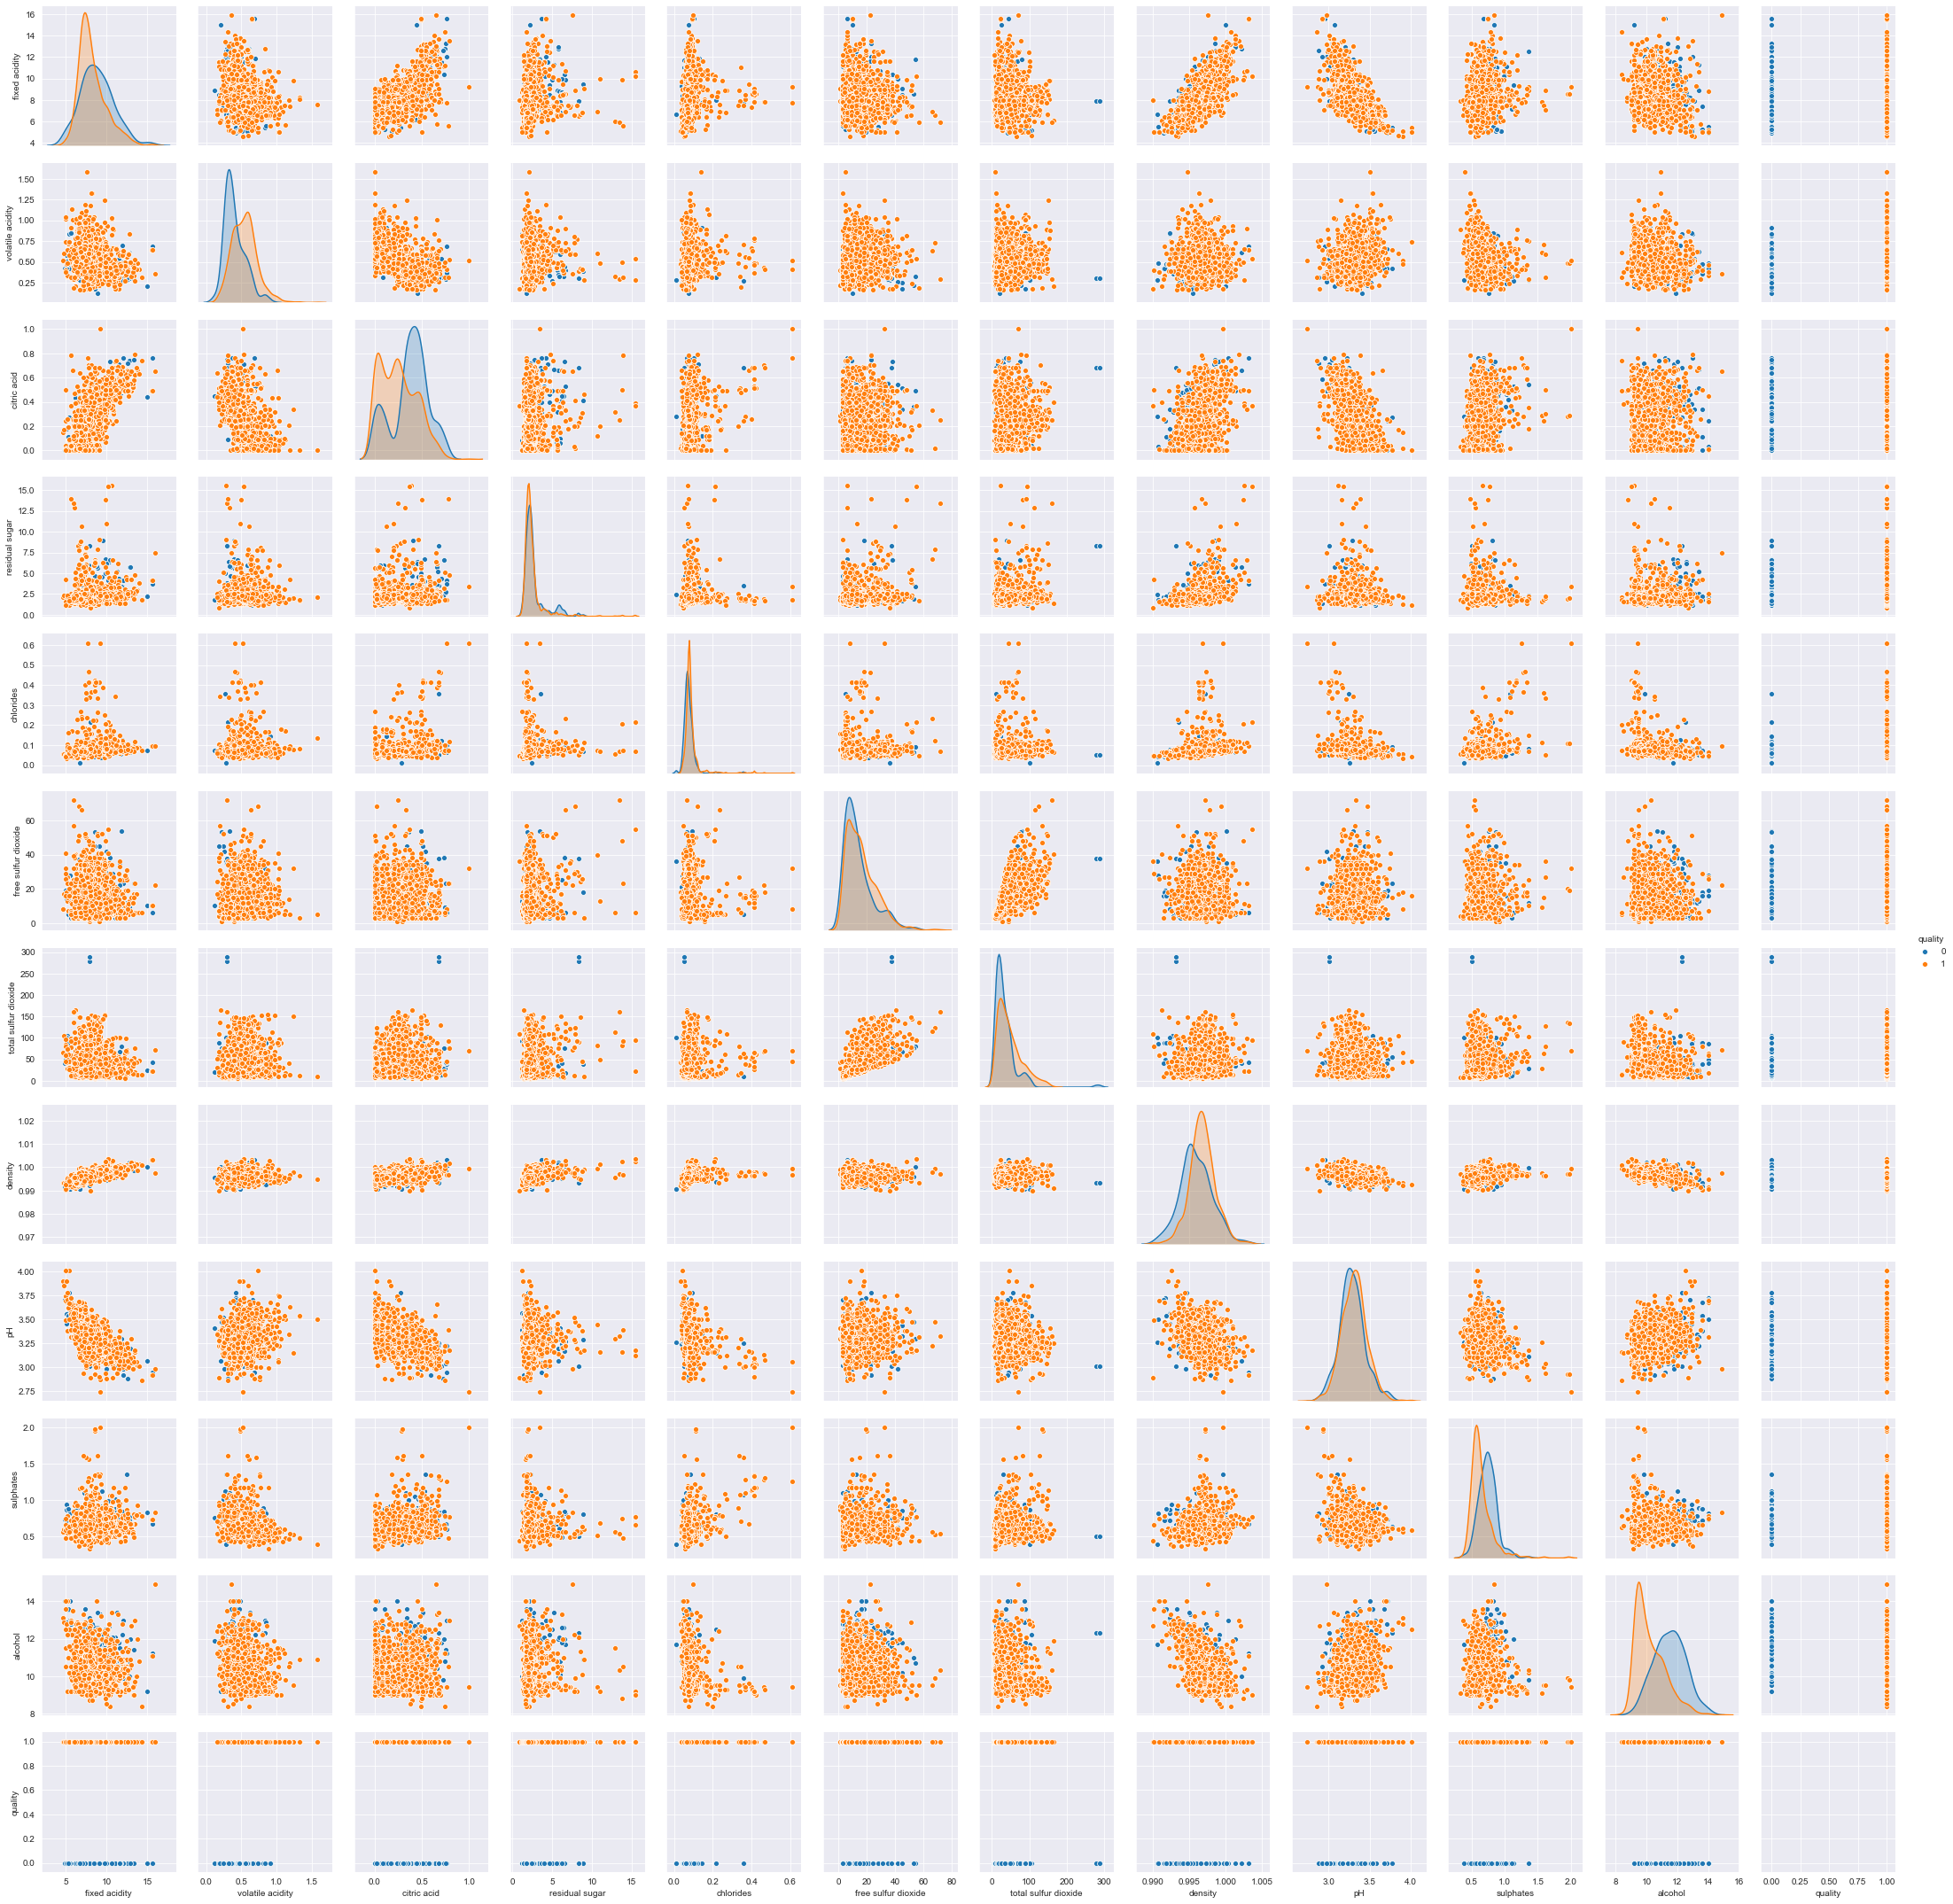

In [37]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='quality',kind='scatter')

In [38]:
# Checking the correlation
corr=df.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,-0.12
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,0.27
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,-0.21
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,-0.048
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,0.097
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,0.072
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,0.14
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,0.15
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,0.057
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,-0.2


(12.0, 0.0)

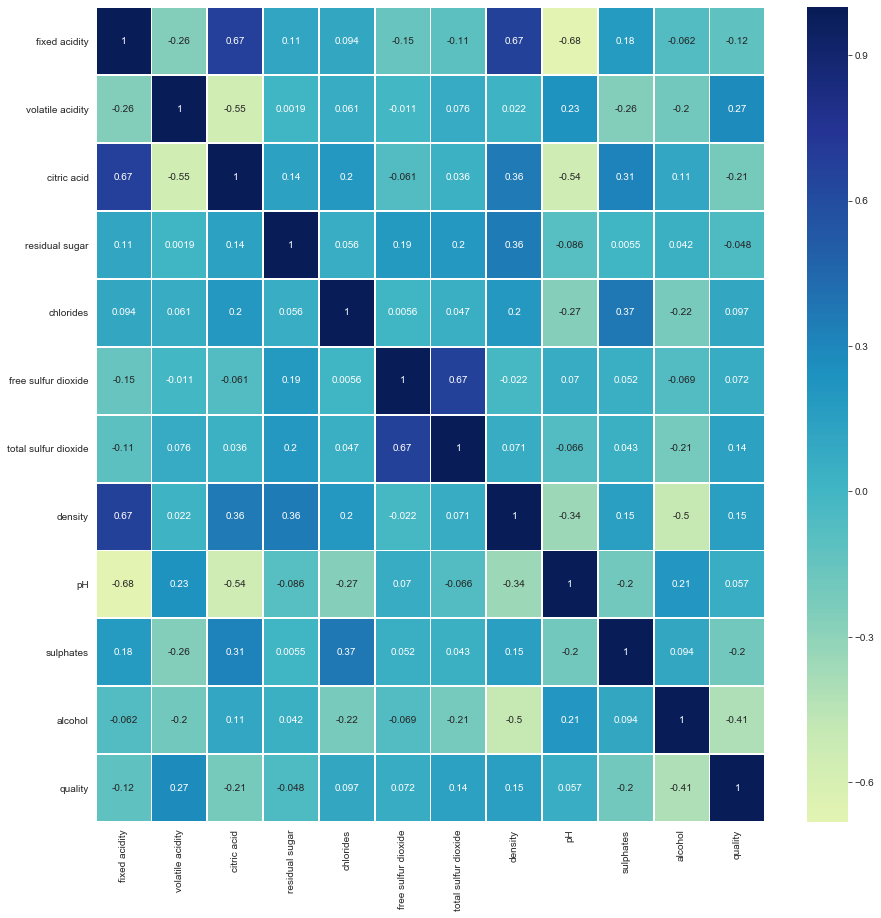

In [39]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [40]:
# checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -2.129363
dtype: float64

In [41]:
# Removing Skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [42]:
# checking the skewness
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                -2.129363
dtype: float64

In [43]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(1599, 12)
(1487, 12)


fixed acidity               AxesSubplot(0.125,0.71587;0.227941x0.16413)
volatile acidity         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
citric acid              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
residual sugar             AxesSubplot(0.125,0.518913;0.227941x0.16413)
chlorides               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
free sulfur dioxide     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
total sulfur dioxide       AxesSubplot(0.125,0.321957;0.227941x0.16413)
density                 AxesSubplot(0.398529,0.321957;0.227941x0.16413)
pH                      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sulphates                     AxesSubplot(0.125,0.125;0.227941x0.16413)
alcohol                    AxesSubplot(0.398529,0.125;0.227941x0.16413)
quality                    AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

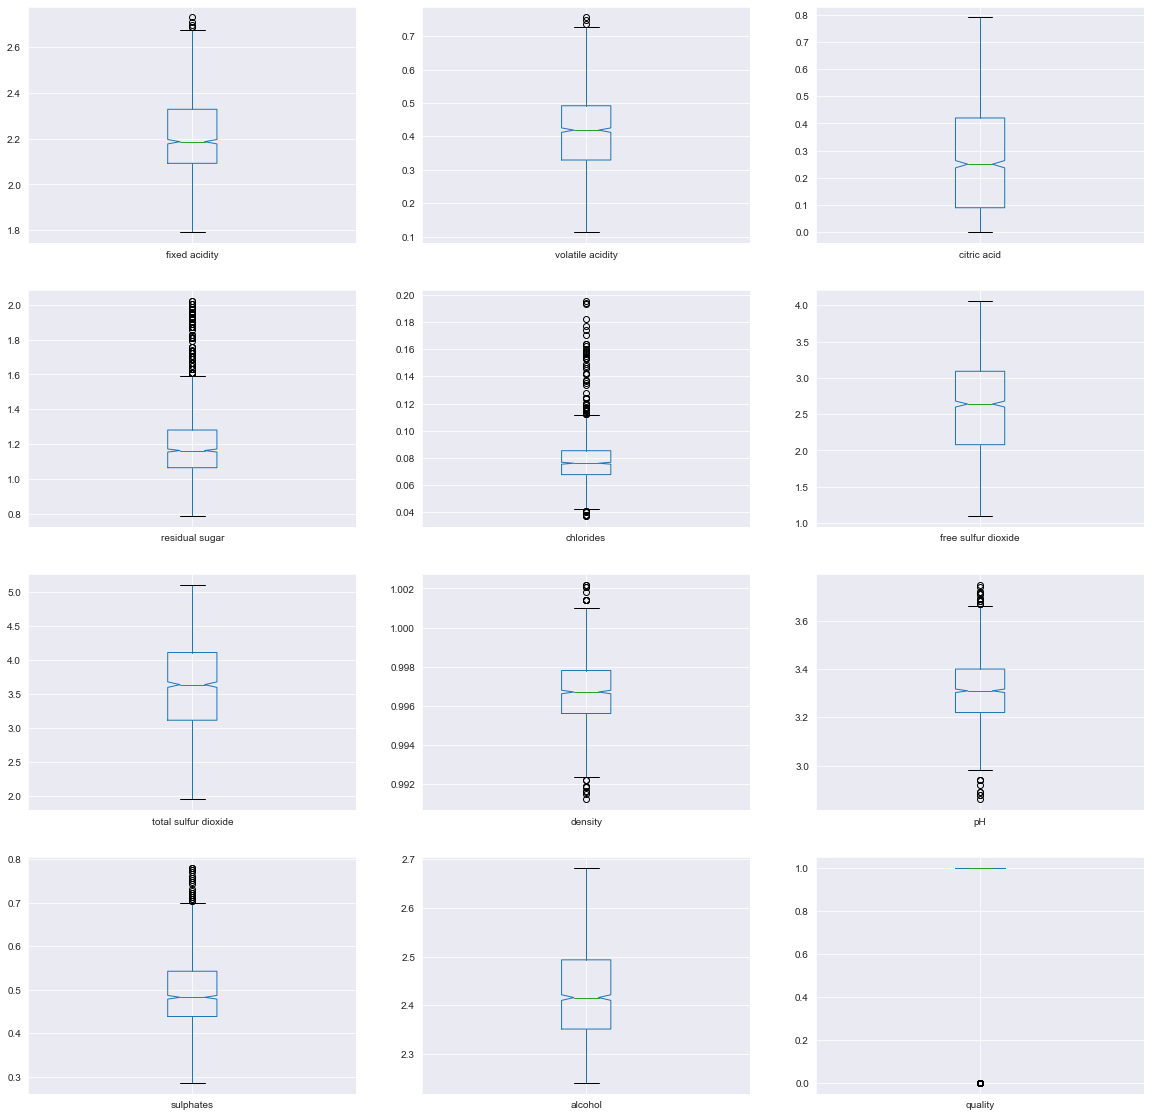

In [44]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(4,3),figsize=(20,20),grid=True,notch=True)

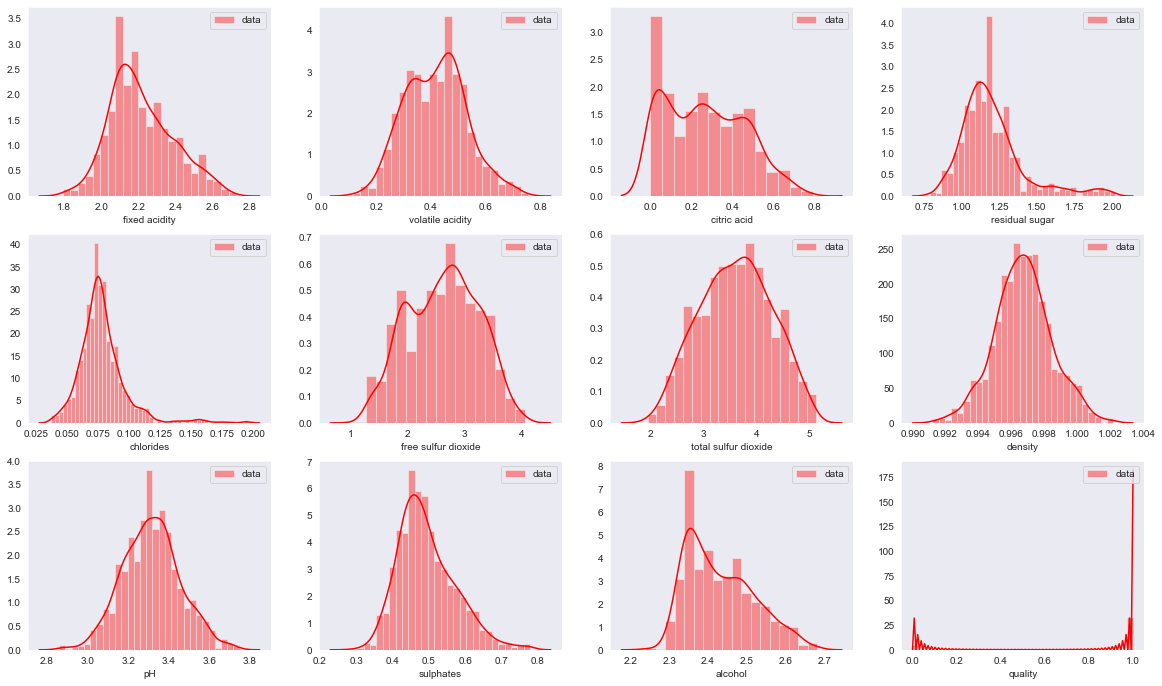

In [45]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [46]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['quality'],axis=1)
x1
print(x1.shape)

(1487, 11)


In [47]:
# Setting up the Target value in variable y.
y=df_new['quality']
y.shape

(1487,)

In [48]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
1,-0.245296,1.919324,-1.383877,0.392784,0.810288,1.035811,0.910470,0.045019,-0.807668,0.313365,-0.592579
2,-0.245296,1.329537,-1.175748,-0.016255,0.519727,0.239627,0.594137,0.159824,-0.386017,0.084838,-0.592579
3,1.649038,-1.518031,1.529931,-0.623678,-0.312284,0.432779,0.748507,0.733849,-1.088769,-0.464971,-0.592579
4,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
...,...,...,...,...,...,...,...,...,...,...,...
1482,-1.408918,0.477287,-0.967618,-0.464307,0.422518,1.426781,0.294956,-1.045629,0.949211,-0.464971,0.128060
1483,-1.655707,0.193395,-0.863554,-0.160912,-0.957454,1.742251,0.510513,-0.919343,1.441137,0.903374,0.806105
1484,-1.328935,-0.040393,-0.707457,-0.016255,-0.262979,1.270482,0.156166,-0.563448,0.738385,0.831106,0.616431
1485,-1.655707,0.725305,-0.759489,-0.464307,-0.312284,1.426781,0.294956,-0.718435,1.792513,0.537847,-0.175261


#  Model Training

In [49]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring,cv):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [50]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy',10)


{'criterion': 'gini', 'max_depth': 4, 'random_state': 12}


In [51]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy',10)


{'learning_rate': 1, 'n_estimators': 100}


In [52]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy',10)

{'n_neighbors': 11}


In [53]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy',10)

{'gamma': 0.001, 'random_state': 1}


In [54]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy',10)

{'C': 0.01}


In [55]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy',10)

{'max_features': 'auto', 'n_estimators': 500}


In [56]:
#     Grid Search for AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy',10)

{'n_estimators': 200}


In [57]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=11)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=12)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=1,n_estimators=500)
RF=RandomForestClassifier(max_features= 'auto', n_estimators= 700,)
AD=AdaBoostClassifier(n_estimators=200,)

In [58]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [59]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  90 is: 0.9032258064516129


Learning Score :  0.8869955156950673
Accuracy Score :  0.9032258064516129
Cross Val Score :  0.8742178487212044
roc auc score :  0.7460142935678944


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        51
           1       0.93      0.96      0.94       321

    accuracy                           0.90       372
   macro avg       0.81      0.75      0.77       372
weighted avg       0.90      0.90      0.90       372



Confusion Matrix:
 [[ 27  24]
 [ 12 309]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weig

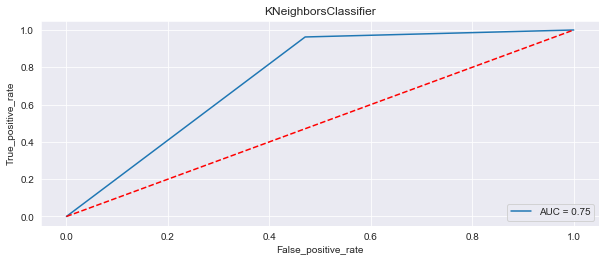

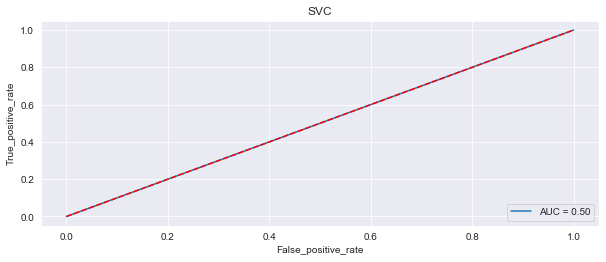

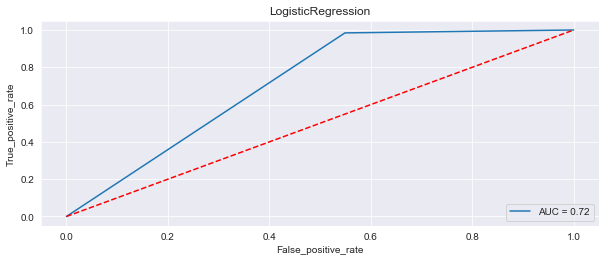

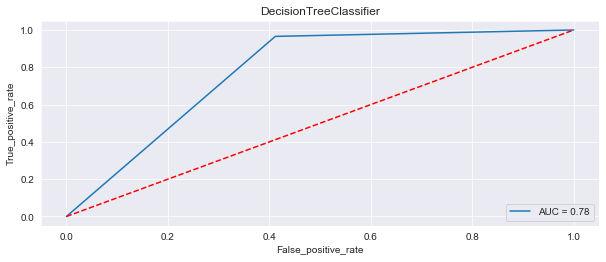

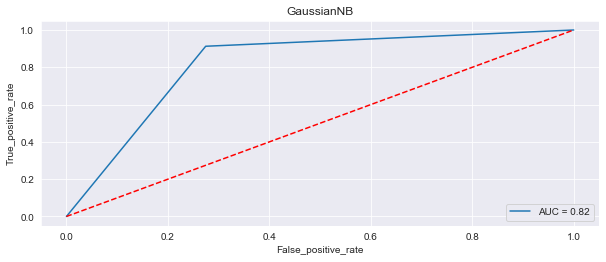

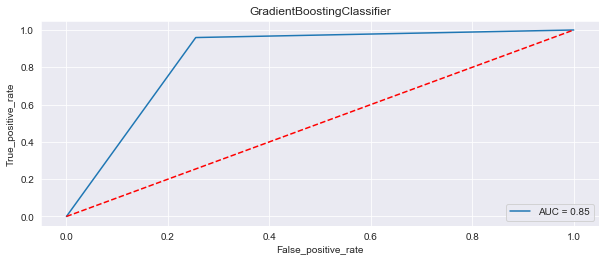

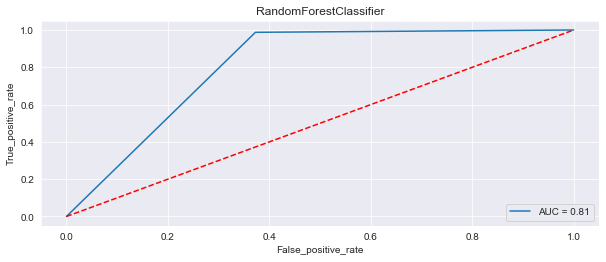

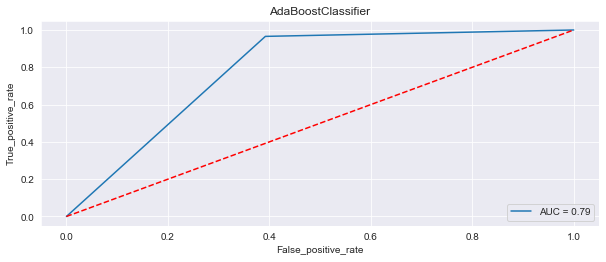

In [60]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    

In [61]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,88.699552,90.322581,87.421785,74.601429
1,SVC,86.457399,86.290323,86.416398,50.000000
2,LogisticRegression,88.161435,91.129032,88.299250,71.770203
3,DecisionTreeClassifier,91.479821,91.397849,88.497908,77.698369
4,GaussianNB,85.919283,88.709677,85.127680,81.913139
5,GradientBoostingClassifier,100.000000,93.010753,87.551055,85.229980
6,RandomForestClassifier,100.000000,93.817204,88.160959,80.749496
7,AdaBoostClassifier,97.309417,91.666667,86.819542,78.678761


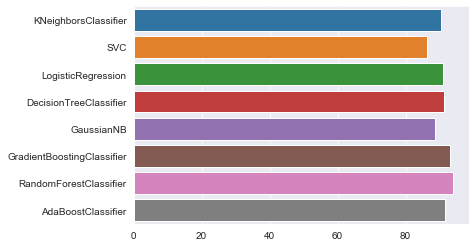

In [62]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score,)

## After all this process conclusion is that GradientBoostingClassifier is performing excellent as accuracy score is 93%.

In [63]:
# Using GradientBoostingClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.25,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=1,n_estimators=500)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
gbcpred=gbc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gbcpred))
print('Confusion Matrix:',confusion_matrix(y_test,gbcpred))
print('Classification Report:',classification_report(y_test,gbcpred))

Accuracy Score: 0.9301075268817204
Confusion Matrix: [[ 38  13]
 [ 13 308]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.75      0.75        51
           1       0.96      0.96      0.96       321

    accuracy                           0.93       372
   macro avg       0.85      0.85      0.85       372
weighted avg       0.93      0.93      0.93       372



(2.0, 0.0)

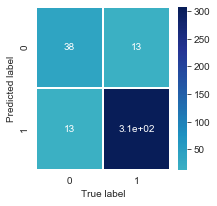

In [64]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, gbcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [65]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=gbcpred
test
# On the lest side values are those which are taken by machine for test...

,quality,Predicted values
1489,1,1
47,1,1
1454,1,1
380,1,1
1195,1,1
...,...,...
315,1,1
1566,1,1
1011,1,1
998,1,1


In [68]:
# Saving the Predicted values in csv file
test.to_csv('Project_5_Red_wine_quality.csv') 

In [69]:
from sklearn.externals import joblib
joblib.dump(gbc,'Project_5_Red_wine_quality.pkl')

['Project_5_Red_wine_quality.pkl']

## Conclusion:               

1) Volatile acidity is inversely proportional to quality.                                          
2) Adding more citric acid results in good quality.                                             
3) Less Chlorides means good quality of wine.                                                         
4) Quality increases if ph value decreases. but ph value should not be reduced below a certain limit.                          
4) Adding Sulphates will increase wine quality.                                                         
5) Quality of wine increases if the wine contains more alcohol.                                                       

## Steps Followed:                                                                      

1) Data Analysis.                                                    
2) EDA Analysis.                                            
3) Best parameters are found using Gridsearch cv and applied to models.                               
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.              
5) AUC ROC Curves are made for each model.                            
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                 
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.      
8) Predicted values are saved in Project_5_Red_wine_quality.csv file.                                 
9) Pickle file is named with Project_5_Red_wine_quality.pkl                         